Decision Tree Accuracy (no depth limit): 0.9853658536585366


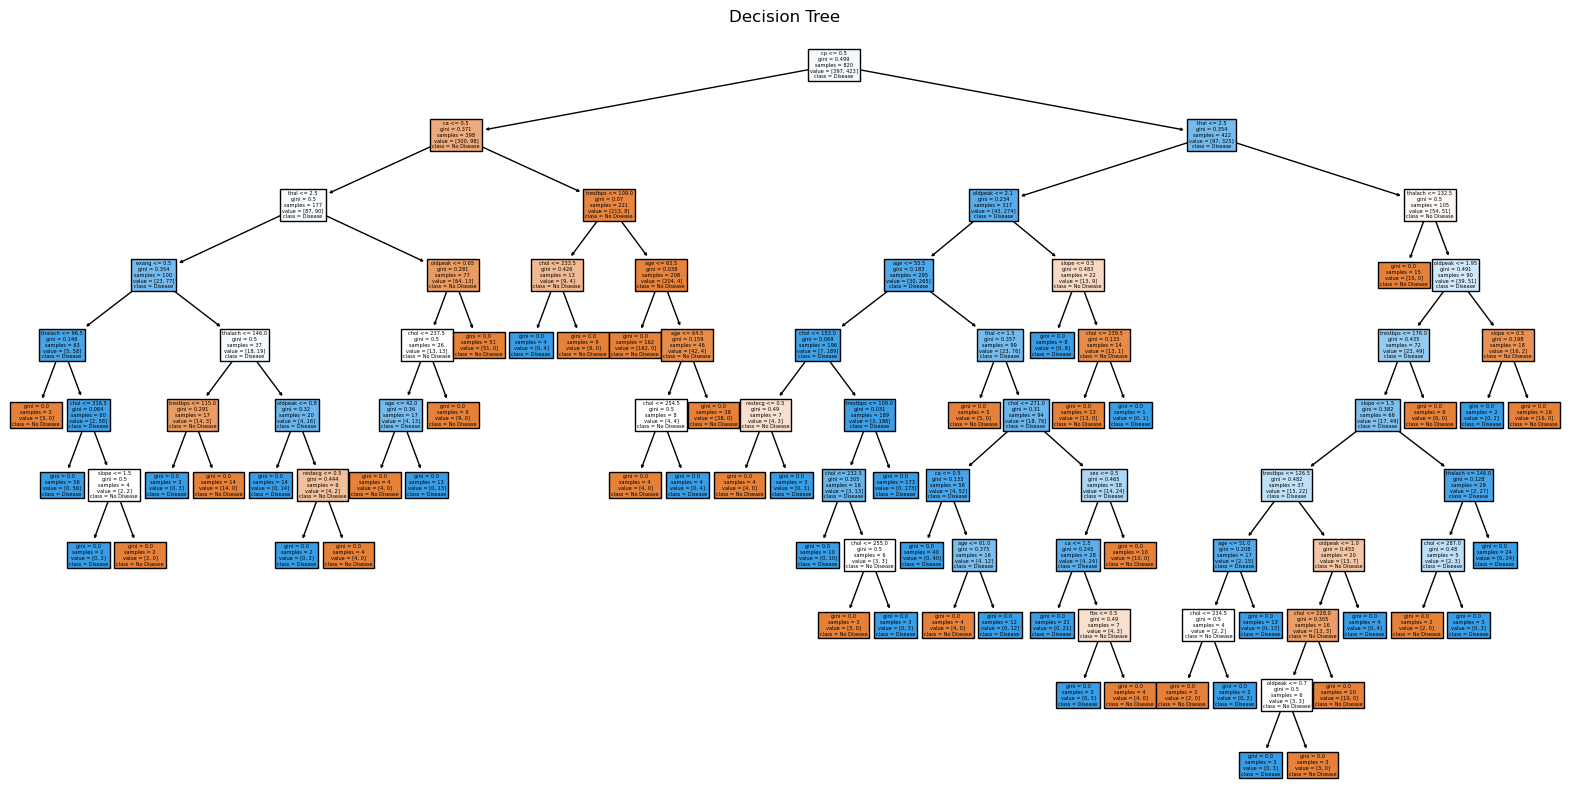

Random Forest Accuracy: 0.9853658536585366

Feature Importances:
cp          0.135072
ca          0.127327
thalach     0.122169
oldpeak     0.121905
thal        0.110518
age         0.077908
chol        0.074822
trestbps    0.071171
exang       0.057594
slope       0.045782
sex         0.028731
restecg     0.018557
fbs         0.008444
dtype: float64


In [11]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns


df = pd.read_csv("heart.csv")  # Ensure the CSV is in the same directory

# Split into features and target
X = df.drop("target", axis=1)
y = df["target"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Train Decision Tree Classifier (no depth limit)
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dtree.predict(X_test)
print("Decision Tree Accuracy (no depth limit):", accuracy_score(y_test, y_pred_dt))

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dtree, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Decision Tree")
plt.show()

#  Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

#  Feature Importance
importances = rf.feature_importances_
feature_series = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("\nFeature Importances:")
print(feature_series)




In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [8]:
dtree_limited = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree_limited.fit(X_train, y_train)
y_pred_dt_limited = dtree_limited.predict(X_test)
print("Decision Tree Accuracy (max depth=3):", accuracy_score(y_test, y_pred_dt_limited))

Decision Tree Accuracy (max depth=3): 0.7804878048780488


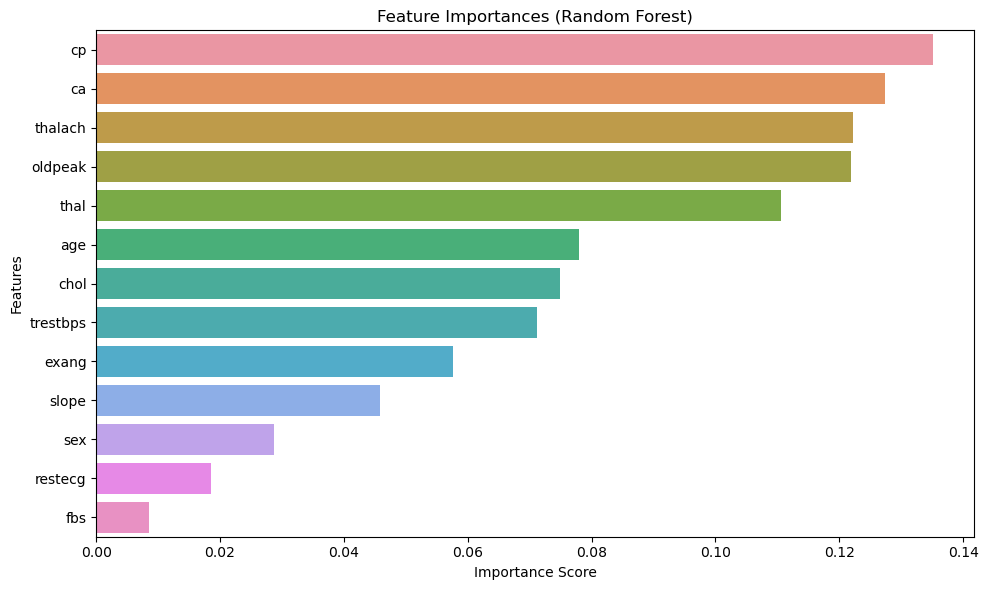

Decision Tree Cross-Validation Accuracy: 1.0000
Random Forest Cross-Validation Accuracy: 0.9971


In [10]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_series, y=feature_series.index)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
cv_score_dt = cross_val_score(dtree, X, y, cv=5).mean()
cv_score_rf = cross_val_score(rf, X, y, cv=5).mean()
print(f"Decision Tree Cross-Validation Accuracy: {cv_score_dt:.4f}")
print(f"Random Forest Cross-Validation Accuracy: {cv_score_rf:.4f}")